<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Imbalance Techniques Experiment**

**Choose Imbalance Techniques:**
1. Resampling Methods:
  * Oversampling
    * SMOTE
    * ADASYN
  * Undersampling
    * Tomek links
    * Near Miss

2. Ensemble Techniques:
  * Random Forest
  * Boosting algorithms

3. Algorithm-specific Methods
  * XGBoost
  * LightGBM

4. Cost-sensitive Learning:  *Can be explored later, future research*

In [9]:
# Load the libraries

import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import psutil
import os

# Warning filter

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics

from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

# Preprocessing

from sklearn.preprocessing import LabelEncoder

# Algorithmns models

import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Class imbalance

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.utils import resample

# Plot Theme

sns.set_theme(style="darkgrid")
plt.style.use("ggplot")

**Load Data**

In [10]:
data = pd.read_csv("KNN Imputation Dataset.csv")

**Label Encode, Drop null from target var, and Convert data to Int**

In [12]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# make small letters
data['country'] = data['country'].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Fit and transform the countries data
data["country"] = label_encoder.fit_transform(data['country'])

data = data.dropna()

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('int64')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             2189 non-null   int64
 1   no_employees              2189 non-null   int64
 2   tech_company              2189 non-null   int64
 3   company_role              2189 non-null   int64
 4   benefits                  2189 non-null   int64
 5   care_options              2189 non-null   int64
 6   wellness_program          2189 non-null   int64
 7   seek_help                 2189 non-null   int64
 8   anonymity                 2189 non-null   int64
 9   leave                     2189 non-null   int64
 10  mental_importance         2189 non-null   int64
 11  neg_consequence_coworker  2189 non-null   int64
 12  discuss_mh                2189 non-null   int64
 13  work_interfere            2189 non-null   int64
 14  coworkers                 2189 non-null 

In [22]:
data.head()

,self_employed,no_employees,tech_company,company_role,benefits,care_options,wellness_program,seek_help,anonymity,leave,...,supervisor,mental_health_interview,family_history,past_mental_health,mental_health,mental_health_diagnosed,treatment,age,gender,country
0,0,2,1,0,3,0,0,0,2,1,...,2,2,0,1,0,1,0,39,0,77
1,0,1,1,1,0,1,1,1,1,2,...,2,0,1,1,1,1,1,29,0,78
2,0,1,1,1,0,1,0,0,2,3,...,2,1,0,2,0,0,1,38,0,77
3,1,3,0,1,0,1,0,0,1,2,...,2,2,0,1,1,1,1,43,0,77
4,0,1,0,1,1,1,0,0,0,3,...,2,0,1,1,1,1,1,43,1,78


### **Split Dataset**

In [18]:
X = data.drop(["mental_health_diagnosed"], axis=1)
y = data['mental_health_diagnosed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

### **Baseline Model**

In [19]:
# Define a list of classifiers
classifiers = {
    "SVM": SVC(),
    "NB_": GaussianNB(),
    "DT_": DecisionTreeClassifier(),
    "RF_": RandomForestClassifier(),
    "LR_": LogisticRegression()
}

In [20]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- SVM ---
Accuracy: 0.6621004566210046
Precision: 0.6621004566210046
Recall: 1.0
F1 Score: 0.7967032967032966
ROC AUC: 0.5
Kappa: 0.0
Geometric Mean: 0.0
Balanced Accuracy: 0.5
Confusion Matrix:
[[  0 148]
 [  0 290]]


--- NB_ ---
Accuracy: 0.867579908675799
Precision: 0.9202898550724637
Recall: 0.8758620689655172
F1 Score: 0.8975265017667845
ROC AUC: 0.8636067101584343
Kappa: 0.7107528350867605
Geometric Mean: 0.8635197484778119
Balanced Accuracy: 0.8636067101584343
Confusion Matrix:
[[126  22]
 [ 36 254]]


--- DT_ ---
Accuracy: 0.860730593607306
Precision: 0.9074733096085409
Recall: 0.8793103448275862
F1 Score: 0.8931698774080561
ROC AUC: 0.8518173345759554
Kappa: 0.6933125186528617
Geometric Mean: 0.8513735407395444
Balanced Accuracy: 0.8518173345759552
Confusion Matrix:
[[122  26]
 [ 35 255]]


--- RF_ ---
Accuracy: 0.9178082191780822
Precision: 0.9150326797385621
Recall: 0.9655172413793104
F1 Score: 0.9395973154362417
ROC AUC: 0.8949207828518174
Kappa: 0.8113153360137852
Geome

### **Apply Imbalance Techniques**

**Explore the class distribution**

In [ ]:
class_counts = data['mental_health_diagnosed'].value_counts()
print(class_counts)

0    716
1    714
Name: mental_health_diagnosed, dtype: int64


**Visualize the class distribution**

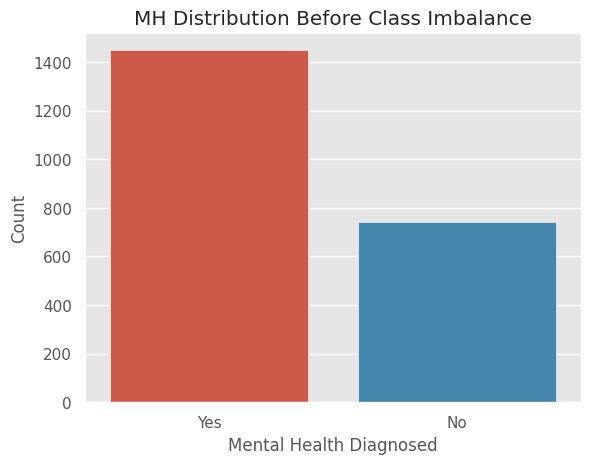

In [17]:
# Create a copy of the original dataset
new_data = data.copy()

mh_mapping = {0: 'No', 1: 'Yes'}
new_data['mh_label'] = new_data['mental_health_diagnosed'].map(mh_mapping)

# Plot the distribution based on the new dataset
sns.countplot(data=new_data, x='mh_label')
plt.xlabel('Mental Health Diagnosed')
plt.ylabel('Count')
plt.title('MH Distribution Before Class Imbalance')
plt.show()

#### **Resampling Methods**

##### **1. Synthetic Minority Over-sampling Technique (SMOTE)**

In [23]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

smote_imbal = y_train_resampled.value_counts()

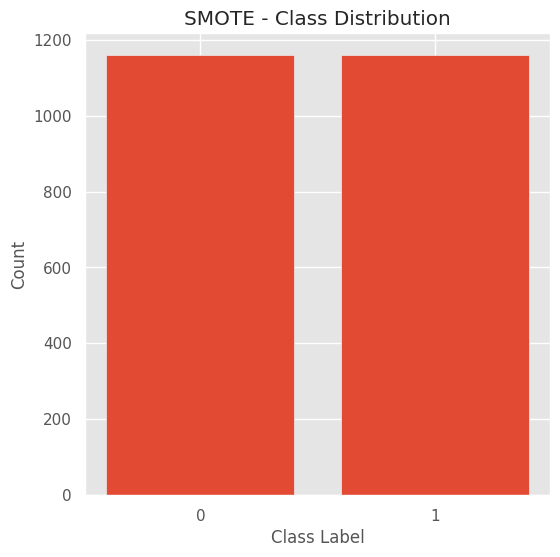

In [24]:
# Plot the class distribution
plt.figure(figsize=(6, 6))
plt.bar(smote_imbal.index, smote_imbal.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('SMOTE - Class Distribution')
plt.xticks(smote_imbal.index)
plt.show()

In [25]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- SVM ---
Accuracy: 0.769406392694064
Precision: 0.8269896193771626
Recall: 0.8241379310344827
F1 Score: 0.8255613126079447
ROC AUC: 0.7431500465983225
Kappa: 0.48549696448093793
Geometric Mean: 0.7387238687991907
Balanced Accuracy: 0.7431500465983225
Confusion Matrix:
[[ 98  50]
 [ 51 239]]


--- NB_ ---
Accuracy: 0.8698630136986302
Precision: 0.9175627240143369
Recall: 0.8827586206896552
F1 Score: 0.8998242530755711
ROC AUC: 0.8636766076421248
Kappa: 0.7143543626003982
Geometric Mean: 0.8634657835526911
Balanced Accuracy: 0.863676607642125
Confusion Matrix:
[[125  23]
 [ 34 256]]


--- DT_ ---
Accuracy: 0.8698630136986302
Precision: 0.911660777385159
Recall: 0.8896551724137931
F1 Score: 0.9005235602094241
ROC AUC: 0.8603681267474372
Kappa: 0.7124858926227053
Geometric Mean: 0.8598695147980482
Balanced Accuracy: 0.860368126747437
Confusion Matrix:
[[123  25]
 [ 32 258]]


--- RF_ ---
Accuracy: 0.906392694063927
Precision: 0.9136212624584718
Recall: 0.9482758620689655
F1 Score: 0.930

#### **2. Adaptive Synthesis**